In [18]:
path_bootes='/home/mingkang/Desktop/bootes/gs20201102_78_850_reduced_crop.fits'
from astropy.io import fits

In [24]:
source = fits.open(path_bootes)
sci_map = source[0].data[0]
var_map = source[1].data[0]

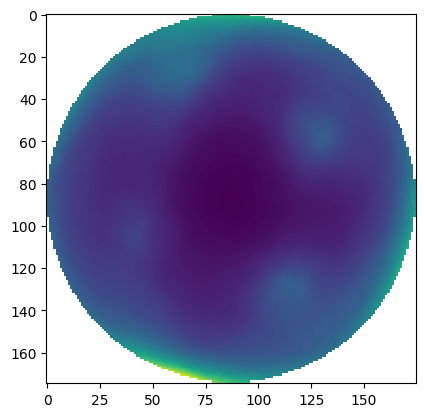

In [25]:
import matplotlib.pyplot as plt
plt.imshow(var_map)

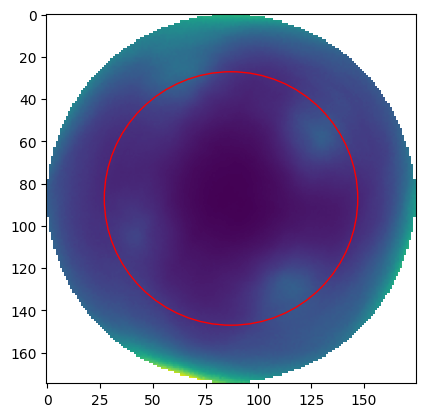

In [32]:
# draw a circle on the image at the center of the image
# the center is 
from matplotlib.patches import Circle
fig, ax = plt.subplots()
ax.imshow(var_map)
circle = Circle((87, 87), 60, color='r', fill=False)
ax.add_patch(circle)
plt.show()

In [22]:
plt.show()

In [7]:
# de-boosting equation:

def deboost(s_obs,snr):
    s_true = s_obs / (1+0.2*(snr/5)**-2.3)
    return s_true

In [3]:
catalog_path = '/home/mingkang/Desktop/bootes/sources.dat'

In [4]:
import pandas as pd
data = pd.read_table(catalog_path,sep='\s+',index_col='obj_id')

In [8]:
data['deboost'] = deboost(data['flux'],data['snr'])

In [10]:
data['ra'] = data['ra']*15

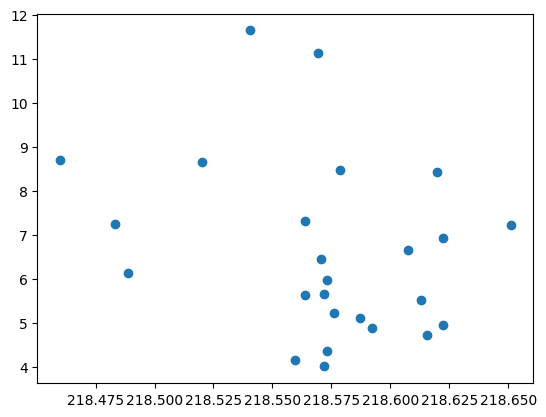

In [15]:
import matplotlib.pyplot as plt
plt.scatter(data['ra'],data['deboost'])

In [41]:
paper_path = '/home/mingkang/Desktop/bootes/paper.csv'
paper = pd.read_csv(paper_path)

In [42]:
paper

,Name,R.A.,Dec.,S/N,S850,S250 (σ250),S350 (σ350),S500 (σ500)
0,Bootes1.01,218.56919,35.54917,7.8,9.9,132.6 (6.3),96.0 (6.5),65.9 (6.9)
1,Bootes1.02,218.52002,35.56137,5.1,7.4,23.8 (6.3),32.7 (6.5),32.2 (7.1)
2,Bootes1.03,218.55963,35.56139,4.6,5.3,9.7 (6.3),18.7 (6.6),15.7 (7.2)
3,Bootes1.04,218.65115,35.57692,4.5,7.5,36.2 (6.3),33.2 (6.5),21.7 (6.9)
4,Bootes1.05,218.54048,35.60583,4.5,9.0,17.9 (6.3),18.4 (6.6),27.9 (7.2)
5,Bootes1.06,218.60744,35.56916,4.4,5.4,10.1 (6.3),11.9 (6.6),9.0 (7.2)
6,Bootes1.07,218.59377,35.55583,4.3,4.6,−9.4 (6.3),16.7 (6.6),4.1 (7.2)
7,Bootes1.08,218.57329,35.57917,4.1,4.6,25.8 (6.3),25.1 (6.6),26.9 (7.3)
8,Bootes1.09,218.61564,35.57694,4.1,5.4,−3.1 (6.3),4.1 (6.6),3.3 (7.2)
9,Bootes1.10,218.58830,35.49250,4.0,7.1,3.0 (6.3),1.8 (6.6),−2.6 (7.2)


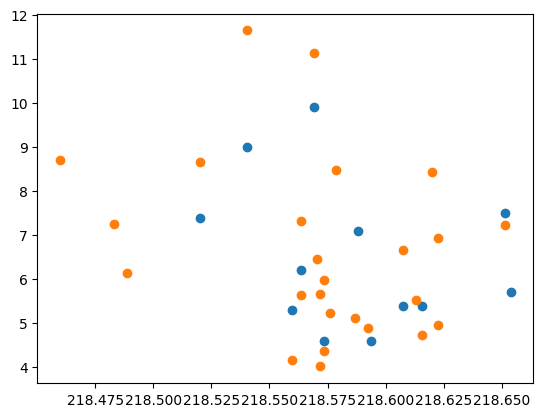

In [43]:
plt.scatter(paper['R.A.'],paper['S850'])
plt.scatter(data['ra'],data['deboost'])
plt.show()

In [44]:
data['ra']

obj_id
1     218.569190
2     218.520018
3     218.563731
4     218.619711
5     218.540485
6     218.607436
7     218.571922
8     218.586943
9     218.592408
10    218.651154
11    218.622489
12    218.612912
13    218.578750
14    218.573285
15    218.571921
16    218.573291
17    218.559628
18    218.570563
19    218.622454
20    218.488646
21    218.563739
22    218.459924
23    218.483098
24    218.615635
25    218.576016
Name: ra, dtype: float64

In [45]:
paper['S850']

0     9.9
1     7.4
2     5.3
3     7.5
4     9.0
5     5.4
6     4.6
7     4.6
8     5.4
9     7.1
10    5.7
11    6.2
Name: S850, dtype: float64

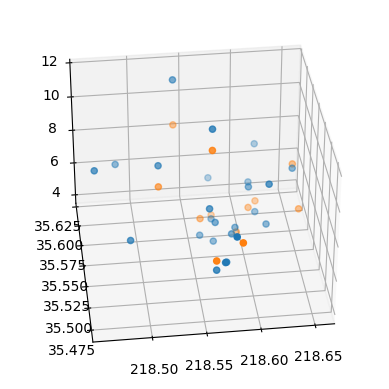

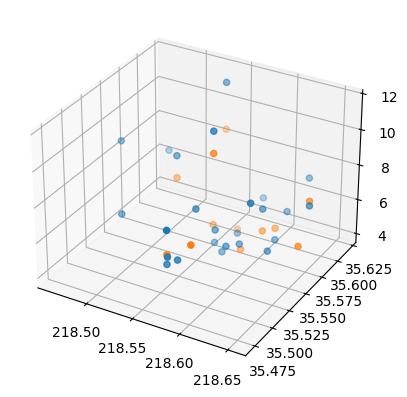

In [50]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data['ra'],data['dec'],data['deboost'])
ax.scatter(paper['R.A.'],paper['Dec.'],paper['S850'])

In [39]:
ax.scatter(data['ra'],data['dec'],data['deboost'])
ax

<Axes3D: >